In [1]:
#yelp_checkin = pd.read_json(r'C:\Users\Owais\Documents\Data Science Course\CIND820\yelp_dataset\yelp_academic_dataset_checkin.json', lines = True)
#yelp_tip = pd.read_json(r'C:\Users\Owais\Documents\Data Science Course\CIND820\yelp_dataset\yelp_academic_dataset_tip.json', lines = True)
#yelp_user = pd.read_json(r'C:\Users\Owais\Documents\Data Science Course\CIND820\yelp_dataset\yelp_academic_dataset_user.json', lines = True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
yelp_business = pd.read_json(r'C:\Users\Owais\Documents\Data Science Course\CIND820\yelp_dataset\yelp_academic_dataset_business.json', lines = True)

In [4]:
business = yelp_business

business = business[['business_id', 'name', 'is_open', 'stars', 'review_count', 'categories', 'attributes', 'state', 'city', 'latitude', 'longitude']]
business.head()


,business_id,name,is_open,stars,review_count,categories,attributes,state,city,latitude,longitude
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,1,4.0,86,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'RestaurantsTableService': 'True', 'WiFi': 'u...",CO,Boulder,40.017544,-105.283348
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,1,4.0,126,"Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",OR,Portland,45.588906,-122.593331
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,1,4.5,13,"Antiques, Fashion, Used, Vintage & Consignment...","{'BusinessAcceptsCreditCards': 'True', 'Restau...",OR,Portland,45.511907,-122.613693
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,1,3.0,8,"Beauty & Spas, Hair Salons","{'RestaurantsPriceRange2': '1', 'BusinessAccep...",FL,Orange City,28.914482,-81.295979
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1,4.0,14,"Gyms, Active Life, Interval Training Gyms, Fit...","{'GoodForKids': 'False', 'BusinessParking': '{...",GA,Atlanta,33.747027,-84.353424


In [5]:
yelp_review = pd.read_json(r'C:\Users\Owais\Documents\Data Science Course\CIND820\yelp_dataset\yelp_academic_dataset_review.json', lines = True)

In [6]:
review = yelp_review

In [7]:
review.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,stars,useful,funny,cool
count,8635403.00,8635403.00,8635403.00,8635403.00
mean,3.73,1.25,0.42,0.50
std,1.46,3.20,1.87,2.24
min,1.00,0.00,0.00,0.00
25%,3.00,0.00,0.00,0.00
50%,4.00,0.00,0.00,0.00
75%,5.00,1.00,0.00,0.00
max,5.00,758.00,610.00,732.00


In [8]:
yelp_review['text length'] = yelp_review['text'].apply(len)
yelp_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02,1856
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25,701
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06,578
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15,390
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01,181


In [9]:
yelp_review['text length'].mean()

606.2530668227065

# Using Open Businesses in City

In [10]:
open_business = business[business['is_open']==1].reset_index(drop = True)

open_business.groupby(['city']).agg({'review_count':'sum', 
                         'business_id':'size'}).sort_values(by = 'review_count', ascending = False).head(10)

,review_count,business_id
city,,
Austin,1100445,16799
Portland,855563,13149
Atlanta,680347,9427
Boston,567220,5821
Orlando,557483,8549
Vancouver,428319,9709
Columbus,228262,5160
Cambridge,157162,1638
Beaverton,92953,1764


In [11]:
business_in_Cambridge = open_business[open_business["city"] == "Cambridge"].reset_index(drop = True)

In [12]:
business_in_Cambridge.rename({"stars": "business_rating"}, axis="columns", inplace = True)
business_in_Cambridge["business_rating"].value_counts().sort_index()

1.0      7
1.5     24
2.0     71
2.5    139
3.0    196
3.5    285
4.0    412
4.5    305
5.0    199
Name: business_rating, dtype: int64

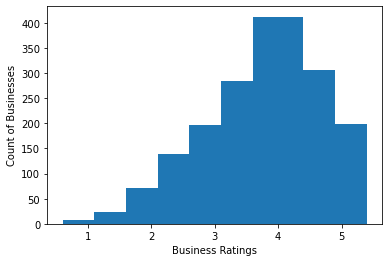

In [13]:
x = business_in_Cambridge['business_rating'].value_counts().sort_index().index
y = business_in_Cambridge['business_rating'].value_counts().sort_index().values
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xlabel('Business Ratings')
plt.ylabel('Count of Businesses')
plt.show()

In [14]:
cols_to_keep = ['business_id', 'name', 'city', 'state','latitude', 'longitude', 'business_rating']
Cambridge_business_reviews = pd.merge(business_in_Cambridge[cols_to_keep], review, left_on = ['business_id']\
                                     , right_on = ['business_id'], how = 'left')

In [15]:
Cambridge_business_reviews.head()

,business_id,name,city,state,latitude,longitude,business_rating,review_id,user_id,stars,useful,funny,cool,text,date,text length
0,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,ZyJ00b99GapcR02FPlwFuw,6UvzmyrLpzvhBZTajB8Fpw,4,0,0,0,Went by the Saturday morning of Marathon weeke...,2018-04-15 12:40:13,259
1,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,LEKsPI_7lYRUjkOR4aLhew,OCW7iqenuttYCfw12nwbHQ,5,0,0,0,I found this place through ClassPass for their...,2017-07-29 18:37:06,1034
2,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,XxUBPYBYzaHz6zyAseowcQ,g9khVXR10yPWhDAXZUJ7Wg,5,0,0,0,I love the Heartbreak Hill Running Company sto...,2017-02-23 14:20:51,402
3,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,I0UKUOfAqMS-t1Bv4EZYgA,u4nDgYF1ATq9haZ4cu_bdw,5,0,0,0,Indoor treadmill studio is perfect option for ...,2018-02-17 17:54:09,312
4,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,Cs35bDgFAOSy9f5ADFYSPQ,4KcQXkqMbJmA1IWpsp5KQA,5,0,0,0,I am not a runner. I have a bit of an aversio...,2018-02-19 02:23:15,1701


In [16]:
Cambridge_business_reviews['text length'].mean()

639.0442245445297

In [17]:
len(Cambridge_business_reviews['text'])

162195

In [18]:
#Check Null values
Cambridge_business_reviews.isnull().sum()

business_id        0
name               0
city               0
state              0
latitude           0
longitude          0
business_rating    0
review_id          0
user_id            0
stars              0
useful             0
funny              0
cool               0
text               0
date               0
text length        0
dtype: int64

# Lowercasing and Removing Punctuations & Stopwords

In [19]:
Cambridge_business_reviews['lowercase'] = Cambridge_business_reviews['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))
Cambridge_business_reviews['punctuation'] = Cambridge_business_reviews['lowercase'].str.replace('[^\w\s]','')

C:\Users\Owais\AppData\Local\Temp/ipykernel_32396/3014888790.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Cambridge_business_reviews['punctuation'] = Cambridge_business_reviews['lowercase'].str.replace('[^\w\s]','')


In [20]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#from nltk.corpus import stopwords

In [21]:
stopwords = STOP_WORDS

In [22]:
print(stopwords)

{"'ll", 'being', 'it', 'whatever', 'myself', 'only', 'yours', 'each', 'into', 'fifteen', '’s', 'third', 'me', 'then', 'formerly', 'must', 'get', 'however', 'everywhere', 'anything', 'which', '‘s', 'without', 'please', 'against', 'other', 'for', 'eight', 'thereupon', 'along', 'hereafter', 'front', 'too', 'go', 'every', '‘ll', 'because', 'beyond', 'n‘t', 'still', 'with', 'about', 'were', 'those', 'or', 'often', 'none', 'where', 'else', "'re", 'whenever', 'why', 'enough', 'she', 'thereby', 'already', 'top', 'call', 'due', 'am', 'whither', 'indeed', 'next', 'anyway', 'always', 'give', 'around', 'have', 'your', 'first', 'yet', 'within', 'by', 'twelve', 'put', 'most', 'if', 'of', 'itself', 'whom', 'mostly', 'beforehand', 'whole', 'though', 'almost', 'same', 'two', "'m", '’ll', 'whether', 'somewhere', 'had', 'on', 'using', 'six', 'could', 'latter', 'between', 'anywhere', 'some', 'so', 'bottom', 'few', 'really', 'even', 'this', 'across', 'therein', 'becomes', 'ca', 'someone', 'just', 'namely',

In [23]:
Cambridge_business_reviews['stopwords'] = Cambridge_business_reviews['punctuation'].apply(lambda x: " ".join(word for word in x.split() if word not in stopwords))

In [24]:
pd.Series(" ".join(Cambridge_business_reviews['stopwords']).split()).value_counts()[:60]

good          85540
place         83087
food          82767
great         68028
like          63710
time          51536
service       45355
ive           36802
dont          34676
got           33880
im            32868
nice          30267
best          28063
delicious     27171
love          26652
little        25997
people        25839
pretty        24706
didnt         24355
menu          24285
staff         23935
came          23865
definitely    23492
order         23385
restaurant    23204
went          23163
come          22930
ordered       22907
try           22388
experience    21105
friendly      20802
know          20171
chicken       19961
think         19468
way           19302
want          19218
better        19207
going         19059
amazing       18469
boston        18449
area          18092
right         18058
wait          17782
bar           17775
day           17734
bit           17703
small         17622
night         17207
new           16874
recommend     16793


In [25]:
other_stopwords = ['im', 'ive', 'get', 'told', 'would', 'us', 'go', 'sure', 'like', 'came', 'didnt', 'told', 'way', 'place', 'got','going','actually','lot','dont','thats','know','wasnt','id','instead','maybe','used','thing','theres','yours','youre','cant','thought','come','said','']

In [26]:
Cambridge_business_reviews['cleaned_reviews'] = Cambridge_business_reviews['stopwords'].apply(lambda x: " ".join(word for word in x.split() if word not in other_stopwords))

In [27]:
pd.Series(" ".join(Cambridge_business_reviews['cleaned_reviews']).split()).value_counts()[:20]

good          85540
food          82767
great         68028
time          51536
service       45355
nice          30267
best          28063
delicious     27171
love          26652
little        25997
people        25839
pretty        24706
menu          24285
staff         23935
definitely    23492
order         23385
restaurant    23204
went          23163
ordered       22907
try           22388
dtype: int64

In [28]:
Cambridge_business_reviews['cleaned_reviews_text_length'] = Cambridge_business_reviews['cleaned_reviews'].apply(lambda x: len(x.split()))
Cambridge_business_reviews['clean_rate'] = Cambridge_business_reviews['cleaned_reviews_text_length'] / Cambridge_business_reviews['text length']


In [29]:
Cambridge_business_reviews.head()

,business_id,name,city,state,latitude,longitude,business_rating,review_id,user_id,stars,...,cool,text,date,text length,lowercase,punctuation,stopwords,cleaned_reviews,cleaned_reviews_text_length,clean_rate
0,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,ZyJ00b99GapcR02FPlwFuw,6UvzmyrLpzvhBZTajB8Fpw,4,...,0,Went by the Saturday morning of Marathon weeke...,2018-04-15 12:40:13,259,went by the saturday morning of marathon weeke...,went by the saturday morning of marathon weeke...,went saturday morning marathon weekend doors o...,went saturday morning marathon weekend doors o...,20,0.077220
1,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,LEKsPI_7lYRUjkOR4aLhew,OCW7iqenuttYCfw12nwbHQ,5,...,0,I found this place through ClassPass for their...,2017-07-29 18:37:06,1034,i found this place through classpass for their...,i found this place through classpass for their...,found place classpass treadmill class normally...,found classpass treadmill class normally hate ...,75,0.072534
2,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,XxUBPYBYzaHz6zyAseowcQ,g9khVXR10yPWhDAXZUJ7Wg,5,...,0,I love the Heartbreak Hill Running Company sto...,2017-02-23 14:20:51,402,i love the heartbreak hill running company sto...,i love the heartbreak hill running company sto...,love heartbreak hill running company stores ne...,love heartbreak hill running company stores ne...,33,0.082090
3,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,I0UKUOfAqMS-t1Bv4EZYgA,u4nDgYF1ATq9haZ4cu_bdw,5,...,0,Indoor treadmill studio is perfect option for ...,2018-02-17 17:54:09,312,indoor treadmill studio is perfect option for ...,indoor treadmill studio is perfect option for ...,indoor treadmill studio perfect option cold ra...,indoor treadmill studio perfect option cold ra...,26,0.083333
4,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,Cs35bDgFAOSy9f5ADFYSPQ,4KcQXkqMbJmA1IWpsp5KQA,5,...,0,I am not a runner. I have a bit of an aversio...,2018-02-19 02:23:15,1701,i am not a runner. i have a bit of an aversion...,i am not a runner i have a bit of an aversion ...,runner bit aversion running need yell guide cl...,runner bit aversion running need yell guide cl...,131,0.077014


# Lemmatization

In [30]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owais\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Owais\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
Cambridge_business_reviews['lemmatized'] = Cambridge_business_reviews['cleaned_reviews'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

In [32]:
Cambridge_business_reviews.head()

,business_id,name,city,state,latitude,longitude,business_rating,review_id,user_id,stars,...,text,date,text length,lowercase,punctuation,stopwords,cleaned_reviews,cleaned_reviews_text_length,clean_rate,lemmatized
0,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,ZyJ00b99GapcR02FPlwFuw,6UvzmyrLpzvhBZTajB8Fpw,4,...,Went by the Saturday morning of Marathon weeke...,2018-04-15 12:40:13,259,went by the saturday morning of marathon weeke...,went by the saturday morning of marathon weeke...,went saturday morning marathon weekend doors o...,went saturday morning marathon weekend doors o...,20,0.077220,went saturday morning marathon weekend door op...
1,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,LEKsPI_7lYRUjkOR4aLhew,OCW7iqenuttYCfw12nwbHQ,5,...,I found this place through ClassPass for their...,2017-07-29 18:37:06,1034,i found this place through classpass for their...,i found this place through classpass for their...,found place classpass treadmill class normally...,found classpass treadmill class normally hate ...,75,0.072534,found classpass treadmill class normally hate ...
2,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,XxUBPYBYzaHz6zyAseowcQ,g9khVXR10yPWhDAXZUJ7Wg,5,...,I love the Heartbreak Hill Running Company sto...,2017-02-23 14:20:51,402,i love the heartbreak hill running company sto...,i love the heartbreak hill running company sto...,love heartbreak hill running company stores ne...,love heartbreak hill running company stores ne...,33,0.082090,love heartbreak hill running company store new...
3,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,I0UKUOfAqMS-t1Bv4EZYgA,u4nDgYF1ATq9haZ4cu_bdw,5,...,Indoor treadmill studio is perfect option for ...,2018-02-17 17:54:09,312,indoor treadmill studio is perfect option for ...,indoor treadmill studio is perfect option for ...,indoor treadmill studio perfect option cold ra...,indoor treadmill studio perfect option cold ra...,26,0.083333,indoor treadmill studio perfect option cold ra...
4,FkS4OmTBeNHPK3sV4PBcIw,Heartbreak Hill Running Company,Cambridge,MA,42.362186,-71.098656,4.5,Cs35bDgFAOSy9f5ADFYSPQ,4KcQXkqMbJmA1IWpsp5KQA,5,...,I am not a runner. I have a bit of an aversio...,2018-02-19 02:23:15,1701,i am not a runner. i have a bit of an aversion...,i am not a runner i have a bit of an aversion ...,runner bit aversion running need yell guide cl...,runner bit aversion running need yell guide cl...,131,0.077014,runner bit aversion running need yell guide cl...


# Sentiment Analysis

In [33]:
from textblob import TextBlob

In [34]:
Cambridge_business_reviews['Polarity'] = Cambridge_business_reviews['lemmatized'].apply(lambda x:TextBlob(x).sentiment[0])
Cambridge_business_reviews['Subjectivity'] = Cambridge_business_reviews['lemmatized'].apply(lambda x:TextBlob(x).sentiment[1])

In [35]:
Cambridge_business_reviews.drop(['lowercase', 'punctuation', 'stopwords'], axis=1, inplace=True)

In [36]:
Cambridge_business_reviews.sort_values(by='name')

,business_id,name,city,state,latitude,longitude,business_rating,review_id,user_id,stars,...,cool,text,date,text length,cleaned_reviews,cleaned_reviews_text_length,clean_rate,lemmatized,Polarity,Subjectivity
6823,r8yr6a2fB0qRyR5JOsxhQQ,&pizza - Harvard Square,Cambridge,MA,42.373574,-71.119568,4.0,ygMEQGdsxoB6LB7n2xHDTA,cSH9T9E0mp_shPIa1A-9aQ,4,...,7,"Blaze was a staple of my college days, so when...",2019-03-07 18:35:04,1748,blaze staple college days opportunity pizza br...,134,0.076659,blaze staple college day opportunity pizza bra...,0.225579,0.599573
6831,r8yr6a2fB0qRyR5JOsxhQQ,&pizza - Harvard Square,Cambridge,MA,42.373574,-71.119568,4.0,nLldkco26WLWkARnzP6Skg,VBjAZ4JxPmaqRqBVbhjRGQ,2,...,0,I visited this new restaurant during my trip t...,2019-03-28 02:47:21,785,visited new restaurant trip cambridge reminded...,63,0.080255,visited new restaurant trip cambridge reminded...,0.320541,0.544026
6830,r8yr6a2fB0qRyR5JOsxhQQ,&pizza - Harvard Square,Cambridge,MA,42.373574,-71.119568,4.0,4BVFrMcfBG_hiBsTvz_ojg,9aP5Xq9qDSzBV6o_vTgzKg,2,...,0,We went in with big expectations considering t...,2019-04-15 22:05:13,378,went big expectations considering lines openin...,35,0.092593,went big expectation considering line opening ...,-0.231481,0.622222
6829,r8yr6a2fB0qRyR5JOsxhQQ,&pizza - Harvard Square,Cambridge,MA,42.373574,-71.119568,4.0,OsirMexWycBgXbarEaJS7w,J3tRNydXPxcC3hb20bhogQ,5,...,0,We were so excited to see that there was an &P...,2019-07-09 15:05:04,234,excited pizza cambridge love dc kids love ingr...,17,0.072650,excited pizza cambridge love dc kid love ingre...,0.362500,0.634524
6828,r8yr6a2fB0qRyR5JOsxhQQ,&pizza - Harvard Square,Cambridge,MA,42.373574,-71.119568,4.0,i9LEjAH07WX3X527zBxJwA,YM0y811yBnyfFonP-tVQxQ,4,...,15,So we had an Elite Event tonight in neighborin...,2019-02-26 05:41:40,1482,elite event tonight neighboring somerville axe...,130,0.087719,elite event tonight neighboring somerville axe...,0.152904,0.648453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25840,yPX1JqblxdnBPhlUi9KvRg,uBreakiFix - Cambridge,Cambridge,MA,42.368541,-71.110222,4.0,j3ivLIgibKNsZEKDF48BVA,YeAVaNsztQzDs5vMg2tHGw,2,...,0,Good news: The staff is pleasant and seem comp...,2019-10-12 13:13:54,1034,good news staff pleasant competent successfull...,78,0.075435,good news staff pleasant competent successfull...,0.190202,0.544747
25841,yPX1JqblxdnBPhlUi9KvRg,uBreakiFix - Cambridge,Cambridge,MA,42.368541,-71.110222,4.0,yuJiBTwDhvYQeXWyFg6V1g,savspXeYgdXGdC2kk-APsA,5,...,0,My Samsung Galaxy S6 smart phone wasn't wirele...,2020-04-15 03:29:26,381,samsung galaxy s6 smart phone wireless chargin...,31,0.081365,samsung galaxy s6 smart phone wireless chargin...,0.491270,0.601587
25818,yPX1JqblxdnBPhlUi9KvRg,uBreakiFix - Cambridge,Cambridge,MA,42.368541,-71.110222,4.0,YYjXMPqeEub95tLLNOIfWA,To4AvctZzmuizLy4pmEwcQ,4,...,0,Really painless to make an appointment to get ...,2019-03-31 20:09:04,277,painless appointment pixel 3 cracked screen re...,24,0.086643,painless appointment pixel 3 cracked screen re...,0.418182,0.677273
25831,yPX1JqblxdnBPhlUi9KvRg,uBreakiFix - Cambridge,Cambridge,MA,42.368541,-71.110222,4.0,sxwksn4ax9WlmR1_J3uDKQ,-NxN5MlSyw9UdJdSDP5zNA,5,...,0,I had my carrier's insurance route the fixing ...,2019-05-28 01:56:20,571,carriers insurance route fixing cracked screen...,47,0.082312,carrier insurance route fixing cracked screen ...,0.206331,0.478247


In [37]:
Cambridge_business_reviews['Polarity'].value_counts()

0.000000    1715
0.500000    1339
0.300000     724
0.250000     688
0.600000     662
            ... 
0.205198       1
0.092394       1
0.062172       1
0.305612       1
0.211905       1
Name: Polarity, Length: 69043, dtype: int64

In [38]:
Cambridge_business_reviews['Sentiment_rating'] = np.where(Cambridge_business_reviews['Polarity'] > 0.1, "Positive", (np.where(Cambridge_business_reviews['Polarity'] < -0.1, "Negative","Neutral")))
Cambridge_business_reviews['Sentiment_rating for ML'] = np.where(Cambridge_business_reviews['Polarity'] > 0, 1, 0)                                                   
Cambridge_business_reviews.tail()

,business_id,name,city,state,latitude,longitude,business_rating,review_id,user_id,stars,...,date,text length,cleaned_reviews,cleaned_reviews_text_length,clean_rate,lemmatized,Polarity,Subjectivity,Sentiment_rating,Sentiment_rating for ML
162190,5-ZGDOVGOj1TyaP4ZVbeLQ,CareWell Urgent Care,Cambridge,MA,42.388925,-71.144494,3.0,D0RLI1PvbMzsxWq0f45r1w,PKK_Xj1gnThzfexCpzXG7g,1,...,2017-10-13 14:54:28,507,fraud charged debit card 3 weeks later 38 3 we...,38,0.074951,fraud charged debit card 3 week later 38 3 wee...,0.100000,0.125000,Neutral,1
162191,5-ZGDOVGOj1TyaP4ZVbeLQ,CareWell Urgent Care,Cambridge,MA,42.388925,-71.144494,3.0,5aSbr5Tqif-FzqFeaxos7A,ZCnGpow8D0aRncIwjkLnZw,5,...,2017-12-04 19:36:39,540,found urgent care quick professional responsiv...,40,0.074074,found urgent care quick professional responsiv...,0.211905,0.521429,Positive,1
162192,5-ZGDOVGOj1TyaP4ZVbeLQ,CareWell Urgent Care,Cambridge,MA,42.388925,-71.144494,3.0,62Aiys8e84S__1c6alFbOw,5nLsNG5RdSLcZkBF_DcdZw,1,...,2020-08-22 13:28:11,512,website doesnt clearly state specifications te...,35,0.068359,website doesnt clearly state specification tes...,0.133333,0.461111,Positive,1
162193,5-ZGDOVGOj1TyaP4ZVbeLQ,CareWell Urgent Care,Cambridge,MA,42.388925,-71.144494,3.0,7y3tKQPYGRJVHkpXKJGi1w,W33YufK57FNnBuWihPTHIg,3,...,2020-11-26 00:14:57,299,day appointment called later evening rapid tes...,29,0.096990,day appointment called later evening rapid tes...,0.164626,0.297959,Positive,1
162194,5-ZGDOVGOj1TyaP4ZVbeLQ,CareWell Urgent Care,Cambridge,MA,42.388925,-71.144494,3.0,pXYqReL5rtqmRWbGM59Ocw,MJzA5mrLpeCV3KyOWjuUGg,1,...,2019-08-16 21:35:17,141,incredibly understaffed customer service terri...,11,0.078014,incredibly understaffed customer service terri...,-0.187500,0.850000,Negative,0


In [39]:
Cambridge_business_reviews['Sentiment_rating'].value_counts().sort_index()

Negative     10647
Neutral      28525
Positive    123023
Name: Sentiment_rating, dtype: int64

In [40]:
Cambridge_business_reviews['Sentiment_rating for ML'].value_counts().sort_index()

0     21765
1    140430
Name: Sentiment_rating for ML, dtype: int64

In [41]:
Cambridge_business_reviews.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,latitude,longitude,business_rating,stars,useful,funny,cool,text length,cleaned_reviews_text_length,clean_rate,Polarity,Subjectivity,Sentiment_rating for ML
count,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00,162195.00
mean,42.37,-71.11,3.78,3.76,1.19,0.41,0.45,639.04,49.19,0.08,0.24,0.60,0.87
std,0.01,0.02,0.59,1.35,2.72,1.55,1.64,560.37,42.29,0.01,0.23,0.14,0.34
min,42.34,-71.16,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,-1.00,0.00,0.00
25%,42.37,-71.12,3.50,3.00,0.00,0.00,0.00,270.00,21.00,0.07,0.11,0.52,1.00
50%,42.37,-71.11,4.00,4.00,0.00,0.00,0.00,477.00,37.00,0.08,0.25,0.60,1.00
75%,42.37,-71.10,4.00,5.00,1.00,0.00,0.00,821.00,63.00,0.08,0.38,0.68,1.00
max,42.50,-70.85,5.00,5.00,285.00,132.00,272.00,5000.00,545.00,0.25,1.00,1.00,1.00


In [42]:
Cambridge_business_reviews[['Sentiment_rating for ML']].describe()

,Sentiment_rating for ML
count,162195.000000
mean,0.865810
std,0.340858
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


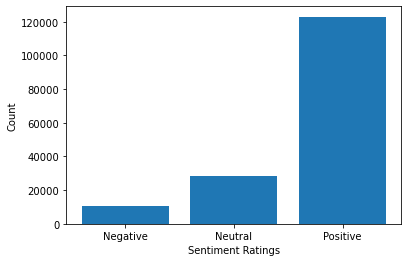

In [43]:
x = Cambridge_business_reviews['Sentiment_rating'].value_counts().sort_index().index
y = Cambridge_business_reviews['Sentiment_rating'].value_counts().sort_index().values
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xlabel('Sentiment Ratings')
plt.ylabel('Count')
plt.show()

# Word Cloud

In [44]:
#pip install wordcloud

In [45]:
from wordcloud import WordCloud

In [46]:
# Dividing the reviews to positive and negative
pos = Cambridge_business_reviews[Cambridge_business_reviews['Sentiment_rating']=="Positive"]['cleaned_reviews']
neg = Cambridge_business_reviews[Cambridge_business_reviews['Sentiment_rating']=="Negative"]['cleaned_reviews']
neu = Cambridge_business_reviews[Cambridge_business_reviews['Sentiment_rating']=="Neutral"]['cleaned_reviews']

In [47]:
print("Positive Sentiment")
pd.Series(" ".join(pos).split()).value_counts()[:20]

Positive Sentiment


good          74162
great         63220
food          62604
time          36282
service       32911
nice          26324
best          26020
delicious     25853
love          23812
menu          19945
definitely    19817
pretty        19684
little        19363
staff         18618
friendly      18614
try           17714
people        17697
restaurant    17344
amazing       17222
went          15952
dtype: int64

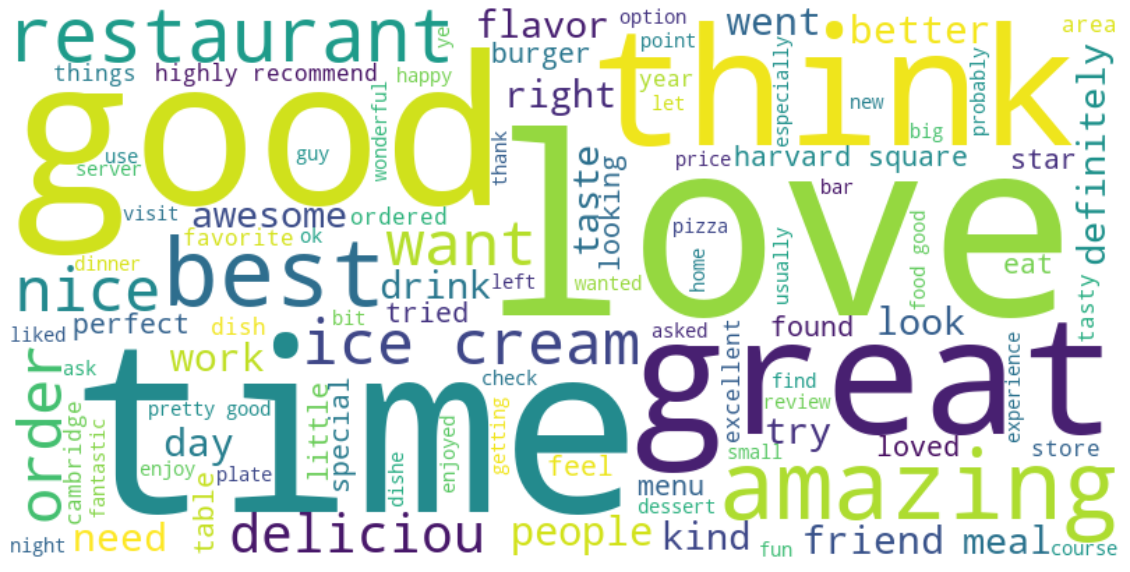

In [48]:
pos_text = " ".join(i for i in pos)

pos_wc = WordCloud(background_color='white', max_words=100, width=800, height=400)
pos_wc.generate(pos_text)
plt.figure(figsize=(20,15))
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
print("Negative Sentiment")
pd.Series(" ".join(neg).split()).value_counts()[:20]

Negative Sentiment


food          4724
service       3687
time          3153
bad           2603
chicken       2328
order         2073
ordered       1803
people        1746
worst         1720
went          1607
asked         1592
terrible      1573
experience    1521
rude          1491
minutes       1447
customer      1339
restaurant    1288
horrible      1185
want          1159
good          1151
dtype: int64

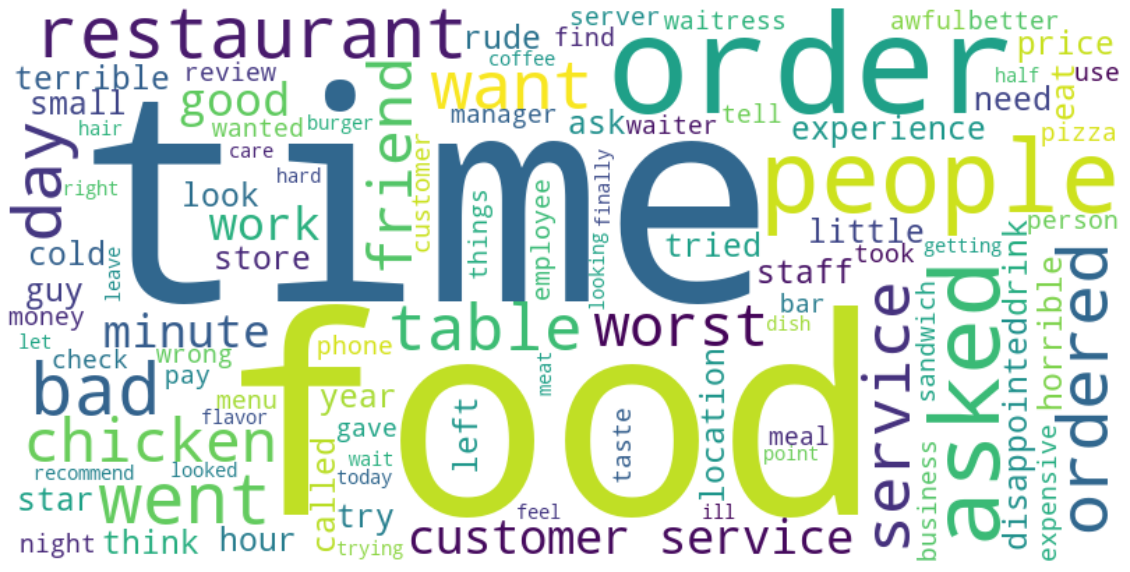

In [50]:
neg_text = " ".join(i for i in neg)

neg_wc = WordCloud(background_color='white', max_words=100, width=800, height=400)
neg_wc.generate(neg_text)
plt.figure(figsize=(20,15))
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
print("Neutral Sentiment")
pd.Series(" ".join(neu).split()).value_counts()[:20]

Neutral Sentiment


food          15439
time          12101
good          10227
service        8757
chicken        6423
people         6396
order          6223
little         5824
went           5604
ordered        5273
bad            5203
minutes        5021
asked          4616
restaurant     4572
pretty         4541
want           4535
think          4528
experience     4440
great          4435
small          4218
dtype: int64

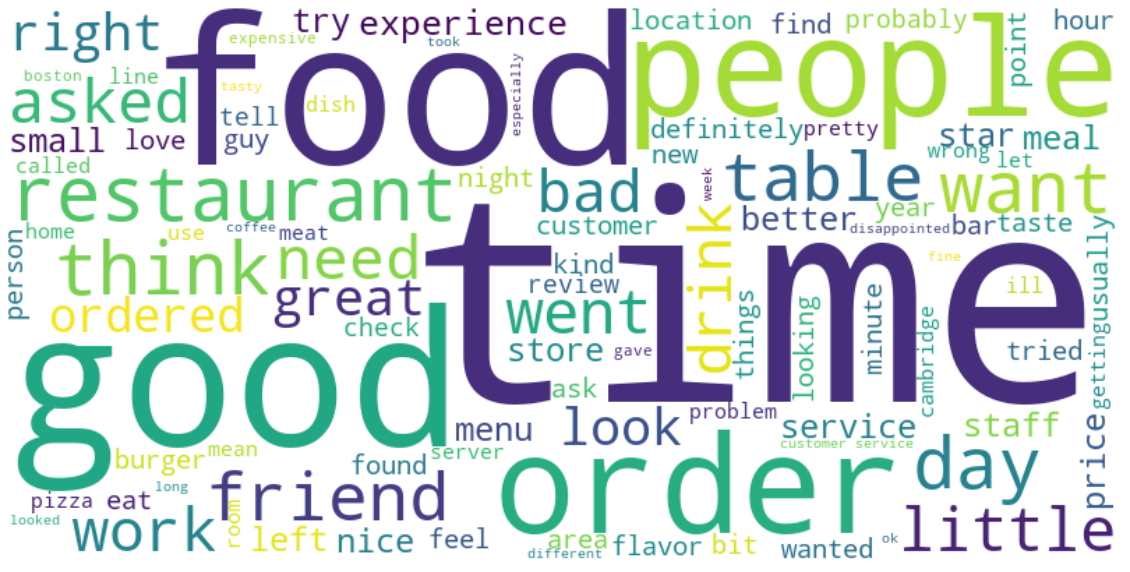

In [52]:
neu_text = " ".join(i for i in neu)

neu_wc = WordCloud(background_color='white', max_words=100, width=800, height=400)
neu_wc.generate(neu_text)
plt.figure(figsize=(20,15))
plt.imshow(neu_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Comparing Sentiment Rating with Star Ratings

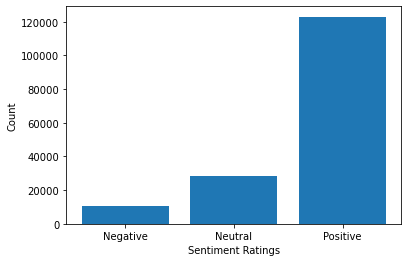

In [53]:
x = Cambridge_business_reviews['Sentiment_rating'].value_counts().sort_index().index
y = Cambridge_business_reviews['Sentiment_rating'].value_counts().sort_index().values
fig, ax = plt.subplots()
plt.bar(x, y)
plt.xlabel('Sentiment Ratings')
plt.ylabel('Count')
plt.show()

In [54]:
print("Star Ratings")
Cambridge_business_reviews["stars"].isnull().sum()

Star Ratings


0

In [55]:
print("Sentiment Ratings")
Cambridge_business_reviews["Sentiment_rating"].isnull().sum()

Sentiment Ratings


0

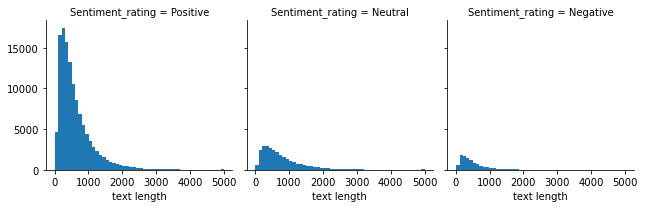

In [56]:
g = sns.FacetGrid(data=Cambridge_business_reviews, col='Sentiment_rating')
g.map(plt.hist, 'text length', bins=50)

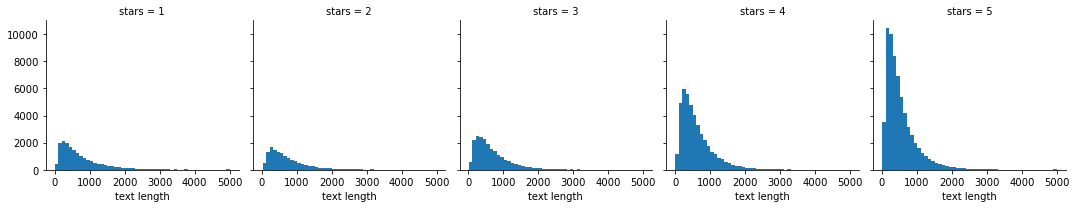

In [57]:
g = sns.FacetGrid(data=Cambridge_business_reviews, col='stars')
g.map(plt.hist, 'text length', bins=50)

<AxesSubplot:xlabel='Sentiment_rating', ylabel='text length'>

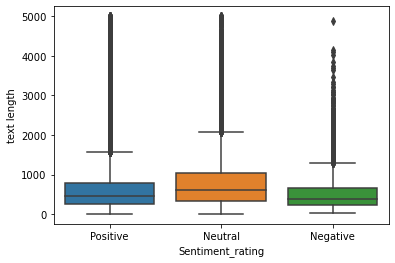

In [58]:
sns.boxplot(x='Sentiment_rating', y='text length', data=Cambridge_business_reviews)

# Machine Learning

In [59]:
#Splitting the data to train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
X = Cambridge_business_reviews["text"]
y = Cambridge_business_reviews["Sentiment_rating for ML"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [61]:
y.value_counts()

1    140430
0     21765
Name: Sentiment_rating for ML, dtype: int64

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((129756,), (32439,), (129756,), (32439,))

# Vectorization

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_1 = TfidfVectorizer(min_df=100, ngram_range=(1,3)).fit(X_train)
X_train1 = vect_1.transform(X_train)
X_test1 = vect_1.transform(X_test)

In [64]:
X_train1.shape, X_test1.shape

((129756, 29202), (32439, 29202))

# Balancing

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
#SMOTE the training data
sm = SMOTE(random_state=1)
X_bal, y_bal = sm.fit_resample(X_train1, y_train)

In [67]:
y_bal.value_counts()

1    112385
0    112385
Name: Sentiment_rating for ML, dtype: int64

# Logistic Regression

In [68]:
# fitting a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Fitting Logistic regression to the training set
logreg = LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1)
logreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

Score on training set: 0.9491121797835939
Score on test set: 0.9294059619593699


In [69]:
from sklearn.metrics import classification_report
print('The Confusion Matrix')
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr)
print('The Classification report')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,3727,667
True 1,1623,26422


The Classification report


,precision,recall,f1-score,support
0,0.696636,0.848202,0.764984,4394.000000
1,0.975377,0.942129,0.958465,28045.000000
accuracy,0.929406,0.929406,0.929406,0.929406
macro avg,0.836006,0.895165,0.861724,32439.000000
weighted avg,0.937621,0.929406,0.932257,32439.000000


# Logistic Regression using Grid Search

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

In [71]:
fitted_search = grid_search.fit(X_bal, y_bal)

In [72]:
fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=1000, random_state=1))])

In [73]:
logreg = LogisticRegression(C=1000, multi_class='auto', random_state=1, solver='lbfgs')
logreg.fit(X_bal, y_bal)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test1)

# Training score
print(f"Score on training set: {logreg.score(X_train1,y_train)}")
print(f"Score on test set: {logreg.score(X_test1,y_test)}")

# Creating confusion matrix/ dataFrame
con_mat_lr = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr = pd.DataFrame(con_mat_lr, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_lr

Score on training set: 0.997811276549832
Score on test set: 0.9540368075464718


,Predicted 0,Predicted 1
True 0,3656,738
True 1,753,27292


# Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_bal, y_bal)
nb_classifier.predict(X_test1)

# Predicting the test set results
y_pred_nb = nb_classifier.predict(X_test1)

# Training score
print(f"Score on training set: {nb_classifier.score(X_train1,y_train)}")
print(f"Score on test set: {nb_classifier.score(X_test1,y_test)}")

Score on training set: 0.8401769475014643
Score on test set: 0.8337186719689262


In [75]:
from sklearn.metrics import classification_report
print('The Confusion Matrix')
con_mat_nb = confusion_matrix(y_test, y_pred_nb)
df_cm_nb = pd.DataFrame(con_mat_nb, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_nb)
print('The Classification report')
report = classification_report(y_test, y_pred_nb, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix


,Predicted 0,Predicted 1
True 0,3446,948
True 1,4446,23599


The Classification report


,precision,recall,f1-score,support
0,0.436645,0.784251,0.560964,4394.000000
1,0.961380,0.841469,0.897437,28045.000000
accuracy,0.833719,0.833719,0.833719,0.833719
macro avg,0.699012,0.812860,0.729200,32439.000000
weighted avg,0.890303,0.833719,0.851860,32439.000000


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier(random_state=42)
my_random_forest.fit(X_bal, y_bal)

# Training score
print(f"Score on training set: {my_random_forest.score(X_train1,y_train)}")
print(f"Score on test set: {my_random_forest.score(X_test1, y_test)}")

Score on training set: 1.0
Score on test set: 0.8949104473010882


In [77]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test1)

# Creating confusion matrix/ dataFrame
print('The Confusion Matrix')
con_mat_RF = confusion_matrix(y_test, y_pred_rand)
df_cm_RF = pd.DataFrame(con_mat_RF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
df_cm_RF



The Confusion Matrix


,Predicted 0,Predicted 1
True 0,1253,3141
True 1,268,27777


In [78]:
print('The Classification report')
report = classification_report(y_test, y_pred_rand, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Classification report


,precision,recall,f1-score,support
0,0.823800,0.285162,0.423669,4394.00000
1,0.898409,0.990444,0.942184,28045.00000
accuracy,0.894910,0.894910,0.894910,0.89491
macro avg,0.861104,0.637803,0.682926,32439.00000
weighted avg,0.888303,0.894910,0.871949,32439.00000
